In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('ToyotaCorolla.csv')
dataset.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
dataset.count()

Id                  1436
Model               1436
Price               1436
Age_08_04           1436
Mfg_Month           1436
Mfg_Year            1436
KM                  1436
Fuel_Type           1436
HP                  1436
Met_Color           1436
Color               1436
Automatic           1436
cc                  1436
Doors               1436
Cylinders           1436
Gears               1436
Quarterly_Tax       1436
Weight              1436
Mfr_Guarantee       1436
BOVAG_Guarantee     1436
Guarantee_Period    1436
ABS                 1436
Airbag_1            1436
Airbag_2            1436
Airco               1436
Automatic_airco     1436
Boardcomputer       1436
CD_Player           1436
Central_Lock        1436
Powered_Windows     1436
Power_Steering      1436
Radio               1436
Mistlamps           1436
Sport_Model         1436
Backseat_Divider    1436
Metallic_Rim        1436
Radio_cassette      1436
Tow_Bar             1436
dtype: int64

In [4]:
dataset.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <span id="3"></span> ** 3. Data Preprocessing and Visualization **

In [5]:
dataset.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

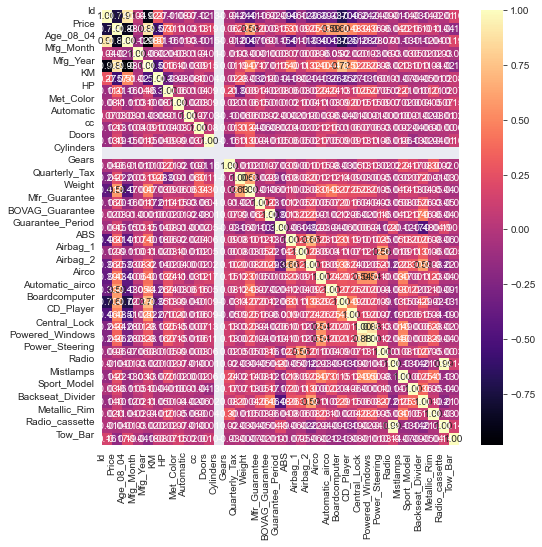

In [6]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


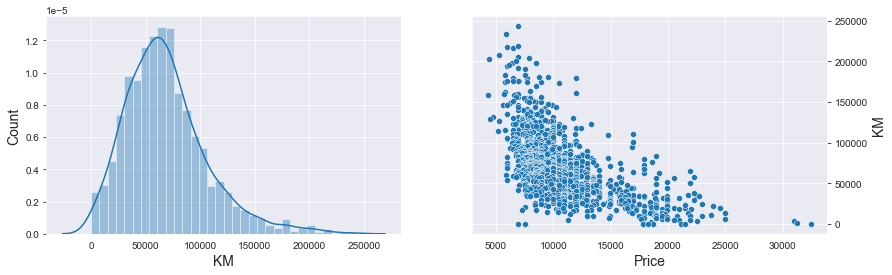

In [9]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['KM'], ax = axes[0])
axes[0].set_xlabel('KM', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'Price', y = 'KM', data = dataset, ax = axes[1])
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_ylabel('KM', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

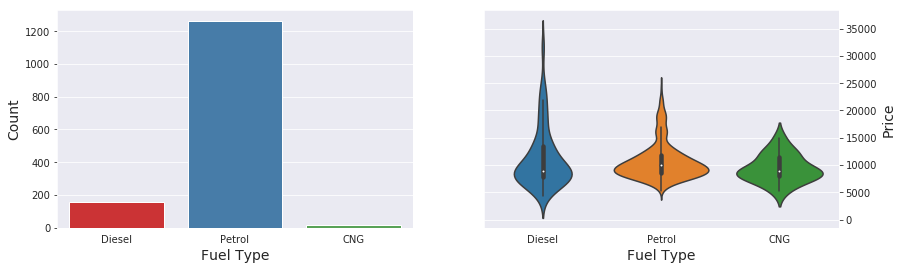

In [9]:
fuel_list= Counter(dataset['FuelType'])
labels = fuel_list.keys()
sizes = fuel_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['FuelType'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Fuel Type', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'FuelType', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('Fuel Type', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

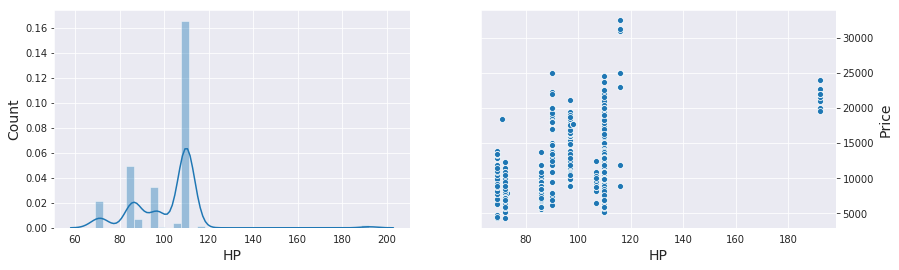

In [10]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['HP'], ax = axes[0])
axes[0].set_xlabel('HP', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'HP', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('HP', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

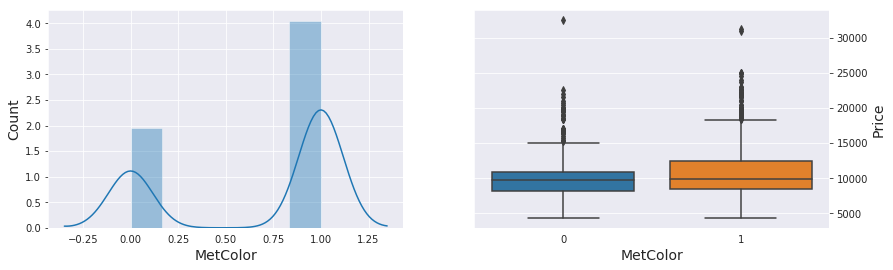

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['MetColor'], ax = axes[0])
axes[0].set_xlabel('MetColor', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'MetColor', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('MetColor', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

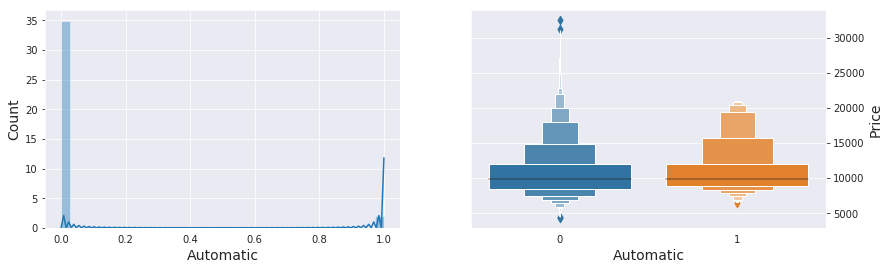

In [12]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Automatic'], ax = axes[0])
axes[0].set_xlabel('Automatic', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Automatic', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('Automatic', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

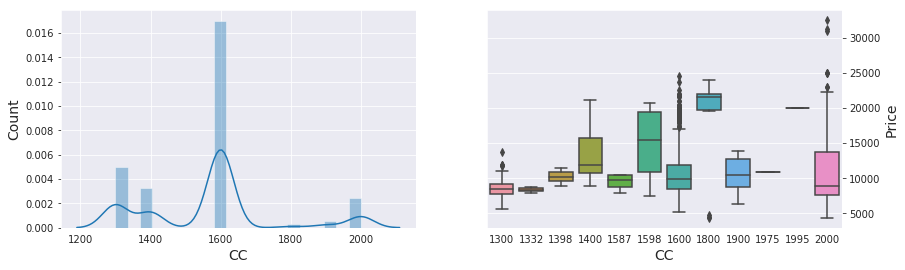

In [13]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['CC'], ax = axes[0])
axes[0].set_xlabel('CC', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'CC', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('CC', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

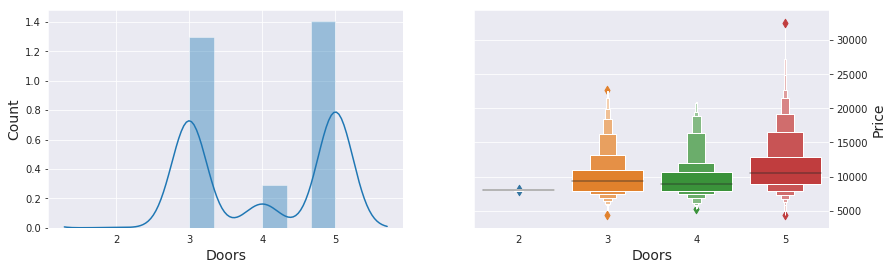

In [14]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Doors'], ax = axes[0])
axes[0].set_xlabel('Doors', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Doors', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('Doors', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

In [10]:
dataset = pd.get_dummies(dataset)

In [11]:
dataset.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,13500,23,10,2002,46986,90,1,0,2000,...,0,0,1,0,0,0,0,0,0,0
1,2,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90,1,0,2000,...,0,0,1,0,0,0,0,0,0,0
3,4,14950,26,7,2002,48000,90,0,0,2000,...,0,1,0,0,0,0,0,0,0,0
4,5,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,0,0,0,0,0,0,0


In [12]:
X = dataset.drop('Price', axis = 1).values
y = dataset.iloc[:, 0].values.reshape(-1,1)

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 419)
Shape of X_test:  (359, 419)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


## <span id="4"></span> ** 4. Regression Models **

### <span id="5"></span> ** Linear Regression **

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

In [21]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.8480754345159047
R2_score (train):  0.8702260786694703
R2_score (test):  0.8621869690956068
RMSE:  1398.4596051422186
